In [1]:
# Import the necessary libraries
import numpy as np,pandas as pd,seaborn as sns, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Read the data into a dataframe
house=pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Information about the dataframe
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Checking any duplicate values present in the dateframe
house.duplicated().value_counts()

False    1460
dtype: int64

There is no duplicate data present in the dataframe.

In [5]:
# Checking description of dataframe
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Checking for null values
df_null=house.columns[house.isna().any()].tolist()
df_null

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

There are some null values present we want to impute them

In [7]:
# Imputing null values for below column by 'NA'
for col in ('Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'):
    house[col]=house[col].fillna('NA')

In [8]:
# Impute missing values of MasVnrArea with mean
house['MasVnrArea'] = house['MasVnrArea'].replace(np.nan,house['MasVnrArea'].mean())  

In [9]:
# Impute missing values of MasVnrType with None
house.MasVnrType = house.MasVnrType.fillna('None')

In [10]:
# Replace Null value by mode of Eletrical
house['Electrical'] = house['Electrical'].replace(np.nan,house['Electrical'].mode()[0])  

In [11]:
# Impute missing values of LotFrontage with mean 
house['LotFrontage'] = house['LotFrontage'].fillna(house['LotFrontage'].mean())  

In [12]:
# Impute missing values of GarageYrBlt with None
house.GarageYrBlt = house.GarageYrBlt.fillna('0')

In [13]:
# Checking null values are imputed by viewing the dataframe information
df_null=house.columns[house.isna().any()].tolist()
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
# Checking for null values after imputing null values
df_null=house.columns[house.isna().any()].tolist()
df_null

[]

No null values are present

In [15]:
# Creating derived variable using existing variable
house['GarageYrBlt']=house['GarageYrBlt'].astype('int64')
house['HouseAge'] = 2022-house.YearBuilt
house['RemodelAge'] = 2022-house.YearRemodAdd
house['SoldAge'] = 2022-house.YrSold
house['GarageAge'] = 2022-house.GarageYrBlt
house[['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt','HouseAge','RemodelAge','SoldAge','GarageAge']].sample(3)

,YearBuilt,YearRemodAdd,YrSold,GarageYrBlt,HouseAge,RemodelAge,SoldAge,GarageAge
914,2009,2009,2009,2009,13,13,13,13
122,1958,1958,2008,1958,64,64,14,64
937,2005,2005,2009,2005,17,17,13,17


Creating new variable using existing variable
1. HouseAge - Difference between current year and build year
2. RemodelAge - Difference between current year and remodel year
3. SoldAge - Difference between current yaer and sold year
4. GarageAge - Difference between current yaer and Garage built year

In [16]:
# Dropping below columns 
house = house.drop(['YearBuilt','YearRemodAdd','YrSold','Id','GarageYrBlt'],axis='columns')

As we created new variable from this there is no need of old variables so,dropping of these variable.
'Id' is not needed for analysis so dropping of it 

In [17]:
# Checking dataframe information
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  RoofStyl

In [18]:
# Replace 2022 value by 0 in GarageAge
house['GarageAge'] = house['GarageAge'].replace(2022,0)  

In [19]:
# Converting below colum to 'object' datatype
house[['MSSubClass','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars','MoSold']]=house[['MSSubClass','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars','MoSold']].astype('object')

Remove numerical attributes that have more than 85% data associated to one value.
- We will remove any column that has one value repeating 1241 times (1241/1460)*100 = 85%) as this column would be skewed
  to one value

In [20]:
# Checking whether datatype is changed
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  RoofStyl

In [21]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    for col in (house):
        if(house[col].value_counts().max() >= 1300):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
house.drop(columnsToBeRemoved, axis = 1, inplace = True)

house.drop(['MoSold'], axis = 1, inplace = True)

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  RoofStyle      1460 non-null   object 
 13  Exterior1st    1460 non-null   object 
 14  Exterior2nd    1460 non-null   object 
 15  MasVnrType     1460 non-null   object 
 16  MasVnrArea     1460 non-null   float64
 17  ExterQual      1460 non-null   object 
 18  ExterCon

In [22]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  TotRmsAbvGrd   1460 non-null   int64  
 13  GarageArea     1460 non-null   int64  
 14  WoodDeckSF     1460 non-null   int64  
 15  OpenPorchSF    1460 non-null   int64  
 16  EnclosedPorch  1460 non-null   int64  
 17  SalePrice      1460 non-null   int64  
 18  HouseAge

In [23]:
# all categorical variables in the dataset
house_category = house.select_dtypes(include=['object'])
house_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LotConfig      1460 non-null   object
 4   Neighborhood   1460 non-null   object
 5   Condition1     1460 non-null   object
 6   BldgType       1460 non-null   object
 7   HouseStyle     1460 non-null   object
 8   RoofStyle      1460 non-null   object
 9   Exterior1st    1460 non-null   object
 10  Exterior2nd    1460 non-null   object
 11  MasVnrType     1460 non-null   object
 12  ExterQual      1460 non-null   object
 13  ExterCond      1460 non-null   object
 14  Foundation     1460 non-null   object
 15  BsmtQual       1460 non-null   object
 16  BsmtExposure   1460 non-null   object
 17  BsmtFinType1   1460 non-null   object
 18  BsmtFinType2   1460 non-null

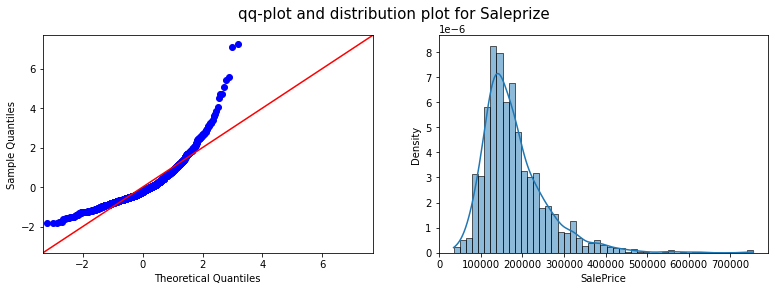

In [24]:
# Checking distribution of target variable
fig,ax=plt.subplots(1,2,figsize=(13, 4))
fig.suptitle("qq-plot and distribution plot for Saleprize",fontsize=15)
sm.qqplot(house['SalePrice'],fit=True,line='45',ax=ax[0])
sns.histplot(house['SalePrice'],kde=True,stat='density',ax=ax[1])
plt.show()

1. SalePrize(target variable) is not in linear form.
2. SalePrize values is right skewed. To overcome this we need to do data tranformation to make it as normal distribution

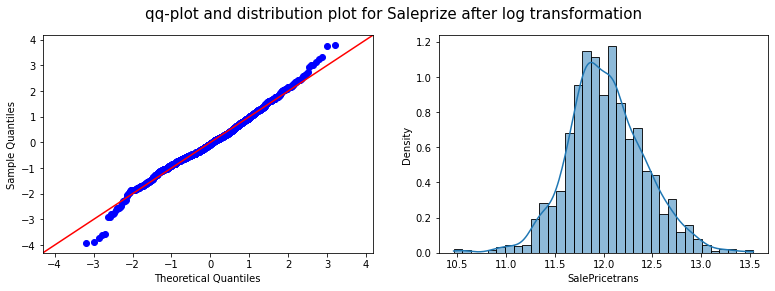

In [25]:
# Making log transformation for target variable
house['SalePricetrans']=np.log(house['SalePrice'])
# Checking distribution of target variable
fig,ax=plt.subplots(1,2,figsize=(13, 4))
fig.suptitle("qq-plot and distribution plot for Saleprize after log transformation",fontsize=15)
sm.qqplot(house['SalePricetrans'],fit=True,line='45',ax=ax[0])
sns.histplot(house['SalePricetrans'],kde=True,stat='density',ax=ax[1])
plt.show()

1. Since, data is skewed we are choosing log transformation.
2. After making log transformation the data look normally distributed, linear.

In [26]:
# Dropping the old data 
house = house.drop('SalePrice',axis='columns')

In [27]:
# Storing all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LotFrontage     1460 non-null   float64
 1   LotArea         1460 non-null   int64  
 2   OverallQual     1460 non-null   int64  
 3   OverallCond     1460 non-null   int64  
 4   MasVnrArea      1460 non-null   float64
 5   BsmtFinSF1      1460 non-null   int64  
 6   BsmtFinSF2      1460 non-null   int64  
 7   BsmtUnfSF       1460 non-null   int64  
 8   TotalBsmtSF     1460 non-null   int64  
 9   1stFlrSF        1460 non-null   int64  
 10  2ndFlrSF        1460 non-null   int64  
 11  GrLivArea       1460 non-null   int64  
 12  TotRmsAbvGrd    1460 non-null   int64  
 13  GarageArea      1460 non-null   int64  
 14  WoodDeckSF      1460 non-null   int64  
 15  OpenPorchSF     1460 non-null   int64  
 16  EnclosedPorch   1460 non-null   int64  
 17  HouseAge        1460 non-null   i

We have total 27 columns of datatype integer and float

In [28]:
# Checking percentile values
house.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,HouseAge,RemodelAge,SoldAge,GarageAge,SalePricetrans
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,6.517808,472.980137,94.244521,46.660274,21.954110,50.732192,37.134247,14.184247,41.080822,12.024051
std,22.024023,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,1.625393,213.804841,125.338794,66.256028,61.119149,30.202904,20.645407,1.328095,25.979541,0.399452
min,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,2.000000,0.000000,0.000000,0.000000,0.000000,12.000000,12.000000,12.000000,0.000000,10.460242
25%,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,5.000000,334.500000,0.000000,0.000000,0.000000,22.000000,18.000000,13.000000,19.000000,11.775097
50%,70.049958,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,6.000000,480.000000,0.000000,25.000000,0.000000,49.000000,28.000000,14.000000,37.500000,12.001505
75%,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,7.000000,576.000000,168.000000,68.000000,0.000000,68.000000,55.000000,15.000000,60.000000,12.273731
90%,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,9.000000,757.100000,262.000000,130.000000,112.000000,97.100000,72.000000,16.000000,74.000000,12.535376
95%,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,10.000000,850.100000,335.000000,175.050000,180.150000,106.000000,72.000000,16.000000,92.000000,12.694958
99%,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,11.000000,1002.790000,505.460000,285.820000,261.050000,122.820000,72.000000,16.000000,104.820000,13.000323


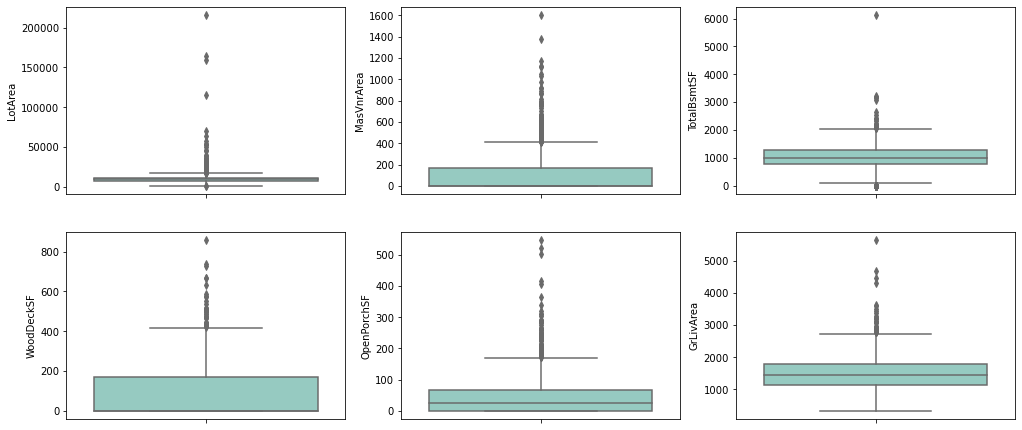

In [29]:
# Check the outliers in all the numeric columns
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = house)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = house)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = house)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = house)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = house)
plt.subplot(5,3,6)
sns.boxplot(y = 'GrLivArea', palette='Set3', data = house)
plt.show()

There is outliers present in all the plots. Need to treat it.

<Figure size 360x216 with 0 Axes>

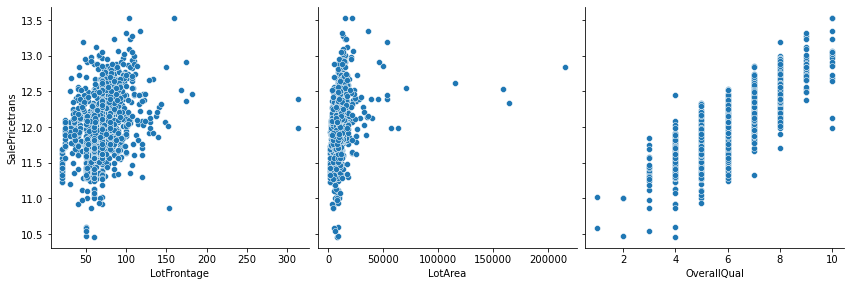

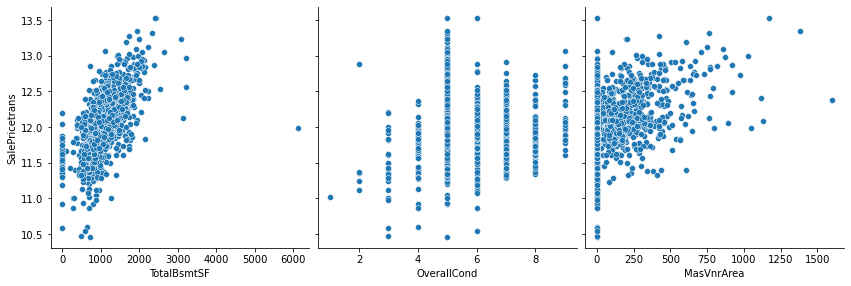

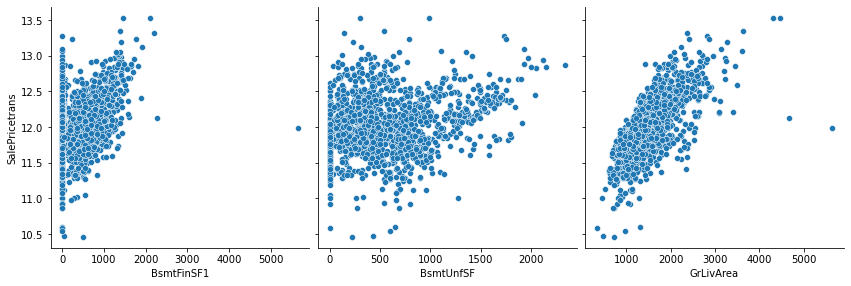

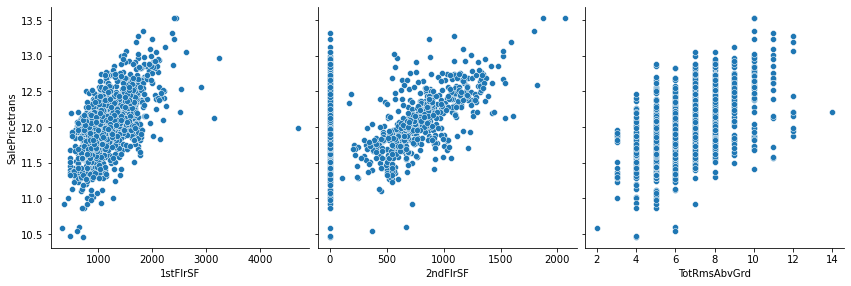

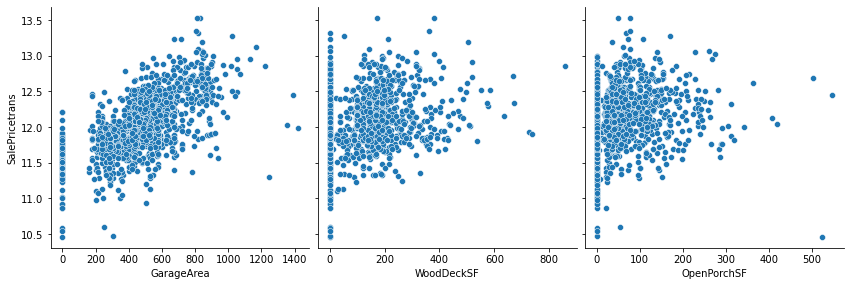

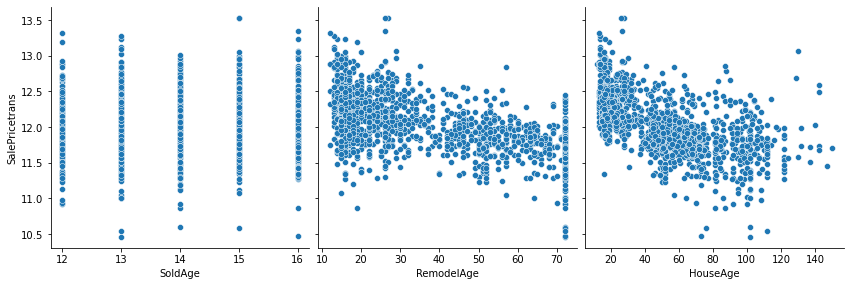

In [30]:
# Check the numerical values using pairplots
plt.figure(figsize=(5,3))
sns.pairplot(house, x_vars=['LotFrontage','LotArea','OverallQual'], y_vars='SalePricetrans',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['TotalBsmtSF', 'OverallCond','MasVnrArea'], y_vars='SalePricetrans',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFinSF1', 'BsmtUnfSF','GrLivArea'], y_vars='SalePricetrans',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['1stFlrSF','2ndFlrSF','TotRmsAbvGrd' ], y_vars='SalePricetrans',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['GarageArea', 'WoodDeckSF','OpenPorchSF'], y_vars='SalePricetrans',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['SoldAge','RemodelAge','HouseAge'], y_vars='SalePricetrans',height=4, aspect=1,kind='scatter')
plt.show()

In [31]:
num_col = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','OpenPorchSF','WoodDeckSF','GarageArea']
def drop_outliers(x):
    
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.95)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house = drop_outliers(house)

In [32]:
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,HouseAge,RemodelAge,SoldAge,GarageAge,SalePricetrans
count,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.00000,1424.000000,1424.000000,1424.000000,1424.000000
mean,69.249606,9612.952247,6.076545,5.578652,97.937357,426.098315,45.474017,568.537921,1040.110253,1146.829354,341.583567,1494.129916,6.487360,468.245084,91.455758,44.957865,21.518961,50.68750,37.169242,14.178371,40.965590,12.012876
std,19.178193,3828.287739,1.362755,1.111238,163.916721,423.101424,158.959559,441.506507,400.954110,359.961460,427.319799,485.212367,1.600635,210.182157,120.986352,61.450284,59.327121,30.21904,20.686602,1.331465,25.975627,0.389023
min,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,2.000000,0.000000,0.000000,0.000000,0.000000,12.00000,12.000000,12.000000,0.000000,10.471950
25%,60.000000,7500.000000,5.000000,5.000000,0.000000,0.000000,0.000000,223.750000,793.000000,876.750000,0.000000,1125.000000,5.000000,321.500000,0.000000,0.000000,0.000000,21.00000,18.000000,13.000000,18.750000,11.770469
50%,70.049958,9375.000000,6.000000,5.000000,0.000000,371.000000,0.000000,482.500000,982.500000,1078.500000,0.000000,1452.500000,6.000000,474.500000,0.000000,24.000000,0.000000,49.00000,28.000000,14.000000,37.000000,11.986669
75%,78.250000,11405.250000,7.000000,6.000000,160.250000,697.000000,0.000000,808.000000,1271.250000,1368.500000,728.000000,1766.250000,7.000000,576.000000,168.000000,66.000000,0.000000,68.00000,55.000000,15.000000,60.000000,12.254863
max,168.000000,29959.000000,10.000000,9.000000,1047.000000,2188.000000,1474.000000,2336.000000,3094.000000,2898.000000,1818.000000,3608.000000,14.000000,1390.000000,736.000000,418.000000,386.000000,150.00000,72.000000,16.000000,122.000000,13.323927


In [33]:
house.shape

(1424, 55)

In [34]:
house.corr()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,HouseAge,RemodelAge,SoldAge,GarageAge,SalePricetrans
LotFrontage,1.000000,0.549274,0.208600,-0.055216,0.176455,0.111414,0.042588,0.160735,0.311443,0.359131,0.047335,0.309876,0.304145,0.316013,0.084613,0.136131,-0.020673,-0.126404,-0.072533,-0.011644,-0.028641,0.351332
LotArea,0.549274,1.000000,0.185809,-0.004850,0.126152,0.154256,0.085313,0.097446,0.303900,0.394284,0.115950,0.396475,0.361056,0.307358,0.158606,0.143864,-0.015098,-0.061108,-0.044966,0.024896,0.032864,0.392547
OverallQual,0.208600,0.185809,1.000000,-0.098878,0.414068,0.207827,-0.066629,0.312610,0.537118,0.465863,0.271065,0.580562,0.412338,0.559287,0.232474,0.321024,-0.130586,-0.583285,-0.552167,0.021905,-0.383691,0.824365
OverallCond,-0.055216,-0.004850,-0.098878,1.000000,-0.134146,-0.028390,0.038663,-0.145321,-0.174649,-0.146788,0.024172,-0.084216,-0.061470,-0.147876,-0.005664,-0.049750,0.092134,0.375253,-0.069470,-0.039411,0.287580,-0.041271
MasVnrArea,0.176455,0.126152,0.414068,-0.134146,1.000000,0.221116,-0.070255,0.129850,0.348460,0.334004,0.136199,0.360690,0.271252,0.379942,0.151069,0.127637,-0.113409,-0.322396,-0.179644,-0.007847,-0.186319,0.437348
BsmtFinSF1,0.111414,0.154256,0.207827,-0.028390,0.221116,1.000000,-0.055908,-0.538939,0.439624,0.364366,-0.191990,0.093777,-0.013633,0.253021,0.171404,0.076401,-0.122775,-0.250076,-0.126863,-0.028815,-0.094447,0.367388
BsmtFinSF2,0.042588,0.085313,-0.066629,0.038663,-0.070255,-0.055908,1.000000,-0.210715,0.105431,0.102358,-0.094634,-0.006274,-0.033444,-0.019890,0.080688,0.020970,0.037706,0.048172,0.070794,-0.023775,0.092757,-0.004436
BsmtUnfSF,0.160735,0.097446,0.312610,-0.145321,0.129850,-0.538939,-0.210715,1.000000,0.448893,0.341100,-0.000492,0.256028,0.252185,0.193653,0.005103,0.127091,-0.009080,-0.152040,-0.181307,0.041247,-0.160332,0.229246
TotalBsmtSF,0.311443,0.303900,0.537118,-0.174649,0.348460,0.439624,0.105431,0.448893,1.000000,0.800671,-0.240654,0.378391,0.250046,0.472350,0.218479,0.228879,-0.124606,-0.412209,-0.305448,0.005587,-0.239438,0.638354
1stFlrSF,0.359131,0.394284,0.465863,-0.146788,0.334004,0.364366,0.102358,0.341100,0.800671,1.000000,-0.262797,0.509057,0.382283,0.475193,0.215605,0.191612,-0.091765,-0.294529,-0.249017,0.006052,-0.161503,0.607254


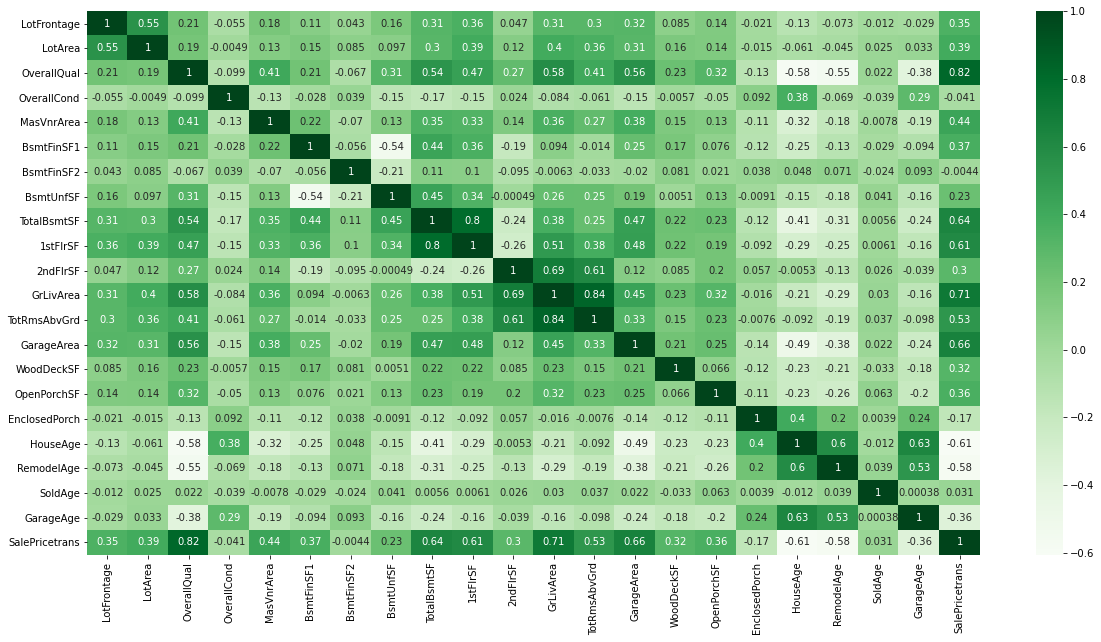

In [35]:
# Check the correlation of numerical columns
plt.figure(figsize = (20, 10))
sns.heatmap(house.corr(), annot = True, cmap="Greens")
plt.show()

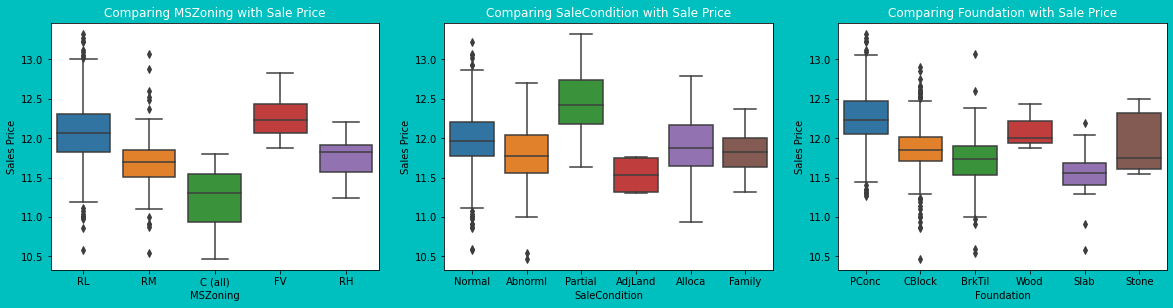

In [36]:
#Assigning figure size
plt.figure(figsize=(20,10),facecolor='c')
# subplot 1
plt.subplot(2,3,1)
sns.boxplot(x='MSZoning', y='SalePricetrans', data=house)
plt.title('Comparing MSZoning with Sale Price',color='w')
plt.xlabel('MSZoning')
plt.ylabel('Sales Price')
# subplot 2
plt.subplot(2,3,2)
sns.boxplot(x='SaleCondition', y='SalePricetrans', data=house)
plt.title('Comparing SaleCondition with Sale Price',color='w')
plt.xlabel('SaleCondition')
plt.ylabel('Sales Price')
# subplot 3
plt.subplot(2,3,3)
sns.boxplot(x='Foundation', y='SalePricetrans', data=house)
plt.title('Comparing Foundation with Sale Price',color='w')
plt.xlabel('Foundation')
plt.ylabel('Sales Price')
plt.show()

In [37]:
house_category = house.select_dtypes(include=['object'])
house_category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1424 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1424 non-null   object
 1   MSZoning       1424 non-null   object
 2   LotShape       1424 non-null   object
 3   LotConfig      1424 non-null   object
 4   Neighborhood   1424 non-null   object
 5   Condition1     1424 non-null   object
 6   BldgType       1424 non-null   object
 7   HouseStyle     1424 non-null   object
 8   RoofStyle      1424 non-null   object
 9   Exterior1st    1424 non-null   object
 10  Exterior2nd    1424 non-null   object
 11  MasVnrType     1424 non-null   object
 12  ExterQual      1424 non-null   object
 13  ExterCond      1424 non-null   object
 14  Foundation     1424 non-null   object
 15  BsmtQual       1424 non-null   object
 16  BsmtExposure   1424 non-null   object
 17  BsmtFinType1   1424 non-null   object
 18  BsmtFinType2   1424 non-null

In [38]:
housing_dum = pd.get_dummies(house_category,drop_first=True)

In [39]:
housing_dum.shape

(1424, 197)

In [40]:
housing_dum.columns

Index(['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=197)

In [41]:
# Merging  the dataframe, with the dummy variable dataset.
house_prize = pd.concat([housing_dum,house_numeric],axis=1)

In [42]:
house_prize.shape

(1424, 219)

# Model Building

##### Splitting the dataframe into Train and Test

In [43]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(house_prize, train_size = 0.7, test_size = 0.3, random_state = 100)

In [44]:
# check the shape of training datatset
df_train.shape

(996, 219)

Out of 935, 291 rows are taken for train dataset

In [45]:
# check the shape of testing datatset
df_test.shape

(428, 219)

Out of 730, 219 rows are taken for test dataset

In [46]:
house_numeric=house_numeric.drop('SalePricetrans',axis='columns')

In [47]:
# Scaling the numerical data
scaler = MinMaxScaler()
num_vars=house_numeric.columns
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
# verifying the values after appying scaling.
df_train.describe()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,HouseAge,RemodelAge,SoldAge,GarageAge,SalePricetrans
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.00000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000

In [48]:
df_train.shape

(996, 219)

In [49]:
# Building the Linear Model
y_train = df_train.pop('SalePricetrans')
X_train = df_train
print(y_train.shape)
print(X_train.shape)

(996,)
(996, 218)


In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [51]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass_30', False, 31),
 ('MSSubClass_40', False, 61),
 ('MSSubClass_45', False, 29),
 ('MSSubClass_50', False, 107),
 ('MSSubClass_60', False, 101),
 ('MSSubClass_70', False, 163),
 ('MSSubClass_75', False, 12),
 ('MSSubClass_80', False, 109),
 ('MSSubClass_85', False, 145),
 ('MSSubClass_90', False, 2),
 ('MSSubClass_120', False, 69),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', False, 100),
 ('MSSubClass_190', False, 43),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 68),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 160),
 ('LotConfig_CulDSac', False, 167),
 ('LotConfig_FR2', False, 63),
 ('LotConfig_FR3', False, 91),
 ('LotConfig_Inside', False, 129),
 ('Neighborhood_Blueste', True, 1),
 ('Neighborhood_BrDale', False, 120),
 ('Neighborhood_BrkSide', False, 140),
 ('Neighborhood_ClearCr', False, 123),
 ('Neighborhood_CollgCr', False, 77),
 ('Neighborhood_Crawfor', True, 1),
 ('

In [52]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'Neighborhood_Blueste', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_StoneBr', 'Condition1_PosA', 'Condition1_RRAe', 'Condition1_RRNn', 'BldgType_Duplex', 'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior2nd_Brk Cmn', 'Foundation_Wood', 'BsmtExposure_Gd', 'BsmtExposure_NA', 'BsmtFinType1_NA', 'BsmtFullBath_2', 'BsmtFullBath_3', 'BedroomAbvGr_5', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageType_NA', 'GarageCars_3', 'GarageCars_4', 'SaleType_CWD', 'SaleType_Oth', 'SaleCondition_AdjLand', 'SaleCondition_Normal', 'SaleCondition_Partial', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd', 'HouseAge', 'RemodelAge'], dtype='object')

In [53]:
# Checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90',
       ...
       'LotFrontage', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SoldAge', 'GarageAge'], dtype='object', length=168)

In [54]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe

,MSSubClass_160,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR3,Neighborhood_Blueste,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_StoneBr,Condition1_PosA,Condition1_RRAe,Condition1_RRNn,BldgType_Duplex,RoofStyle_Shed,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior2nd_Brk Cmn,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_NA,BsmtFinType1_NA,BsmtFullBath_2,BsmtFullBath_3,BedroomAbvGr_5,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageCars_3,GarageCars_4,SaleType_CWD,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,HouseAge,RemodelAge
128,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0.224170,0.555556,0.500,0.254059,0.234004,0.0,0.213316,0.309713,0.4,0.318841,0.733333
737,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0.329768,0.777778,0.500,0.000000,0.000000,0.0,0.288623,0.448076,0.6,0.036232,0.083333
1317,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0.100673,0.666667,0.500,0.000000,0.000000,0.0,0.436975,0.310935,0.3,0.028986,0.050000
150,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0.325835,0.444444,0.625,0.000000,0.327239,0.0,0.313187,0.193952,0.3,0.253623,0.583333
1109,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0.362811,0.777778,0.500,0.040115,0.474863,0.0,0.593407,0.458766,0.5,0.043478,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0.258683,0.666667,0.500,0.000000,0.009141,0.0,0.469942,0.335980,0.4,0.065217,0.150000
54,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0.207410,0.444444,0.500,0.000000,0.175503,0.0,0.124111,0.313378,0.4,0.398551,0.916667
362,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0.213548,0.666667,0.500,0.477555,0.000000,0.0,0.000000,0.485034,0.5,0.050725,0.116667
81,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0.110597,0.555556,0.500,0.423114,0.548903,0.0,0.399806,0.306353,0.3,0.086957,0.200000


In [55]:
# Model 1
import statsmodels.api as sm  

# Adding a constant variable 
X_train_rfe1 = sm.add_constant(X_train_rfe)

 # Running the linear model
lm1 = sm.OLS(y_train,X_train_rfe1).fit()  

# PrintingsSummary of linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         SalePricetrans   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     264.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:09:51   Log-Likelihood:                 863.19
No. Observations:                 996   AIC:                            -1624.
Df Residuals:                     945   BIC:                            -1374.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.90

In [56]:
y_train_pred = lm1.predict(X_train_rfe1)

In [57]:
lm1.params

const                    10.900001
MSSubClass_160           -0.129913
MSZoning_FV               0.257821
MSZoning_RH               0.195326
MSZoning_RL               0.190792
MSZoning_RM               0.145856
LotShape_IR3             -0.079803
Neighborhood_Blueste      0.137282
Neighborhood_Crawfor      0.138357
Neighborhood_MeadowV     -0.091338
Neighborhood_StoneBr      0.135278
Condition1_PosA          -0.135358
Condition1_RRAe          -0.166840
Condition1_RRNn           0.089412
BldgType_Duplex          -0.099236
RoofStyle_Shed           -0.090517
Exterior1st_BrkComm      -0.430148
Exterior1st_BrkFace       0.103247
Exterior2nd_Brk Cmn       0.142102
Foundation_Wood          -0.144171
BsmtExposure_Gd           0.074484
BsmtExposure_NA          -0.074414
BsmtFinType1_NA           0.071558
BsmtFullBath_2            0.137594
BsmtFullBath_3            0.357539
BedroomAbvGr_5           -0.096022
KitchenQual_Fa           -0.101037
KitchenQual_Gd           -0.070432
KitchenQual_TA      

Text(0.5, 0, 'Errors')

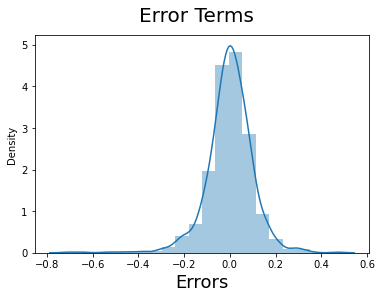

In [58]:
# check if the error terms are also normally distributed by plotting histogram
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)   # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

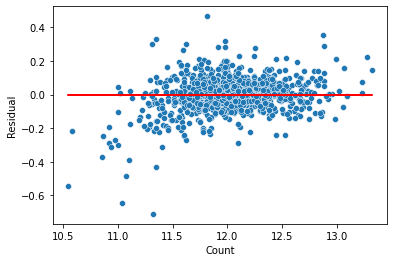

In [59]:
# Checking for Homoscedasticity
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [60]:
# Scaling the numerical data only using transform
num_vars = house_numeric.columns

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [61]:
# Checking the dataframe
df_test.describe()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,HouseAge,RemodelAge,SoldAge,GarageAge,SalePricetrans
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.00000

In [62]:
# Dividing into X_test and y_test
y_test = df_test.pop('SalePricetrans')
X_test = df_test

In [63]:
# use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)

In [64]:
# Making predictions
y_pred = lm1.predict(X_test_new1)

In [65]:
# Calculating R squared value for test data

from sklearn.metrics import r2_score

r2=r2_score(y_true=y_test,y_pred=y_pred)
print(r2)

0.8860670047949761


In [66]:
metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)


0.9332772683795039
0.8860670047949761
10.304200306604823
6.939180144923109
0.010345582637153437
0.016213037721782966


Text(0, 0.5, 'y_pred')

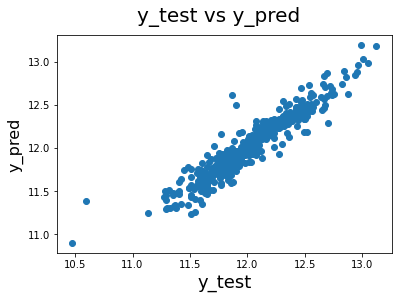

In [67]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

Ridge

In [68]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [ 0.001, 0.01, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0,5.0, 6.0,7.0, 8.0, 9.0,10.0]}

ridge = Ridge()

# cross validation
folds = 10
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train_rfe, y_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
print(ridge_cv.best_params_)

{'alpha': 0.01}


In [70]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[-0.12280482  0.22295449  0.15825033  0.15785421  0.11134785 -0.07493709
  0.11156233  0.13836195 -0.09259434  0.13375687 -0.12470173 -0.16184919
  0.07529838 -0.0926423  -0.07959471 -0.34044878  0.10370811  0.09072305
 -0.13079212  0.07598257 -0.0522137   0.046666    0.13080134  0.29358735
 -0.09229023 -0.10422372 -0.06961313 -0.08448259  0.05613147  0.05579663
  0.06169465 -0.08076521  0.05418948  0.0470803  -0.11240263  0.11803792
  0.12138799  0.06948581  0.12507548  0.20205148  0.50293435  0.33619148
  0.06030254  0.19483609  0.07120733  0.26582856  0.90635871  0.08858036
 -0.4643837  -0.07335677]


In [71]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
#X_test_new = X_test[col]

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)


0.9331070974684231
0.8854486007525982
10.330480333089763
6.976844537443352
0.010371968205913417
0.016301038638886337


In [72]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.01,-0.071205,-0.076672,1
0,0.001,-0.071193,-0.076678,2
2,0.1,-0.071333,-0.076700,3
3,0.2,-0.071495,-0.076802,4
4,0.3,-0.071671,-0.076933,5
5,0.4,-0.071860,-0.077050,6
6,0.5,-0.072052,-0.077168,7
7,0.6,-0.072246,-0.077295,8
8,0.7,-0.072437,-0.077416,9
9,0.8,-0.072626,-0.077528,10


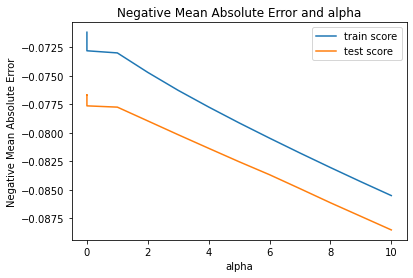

In [73]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

Lasso

In [74]:
lasso = Lasso()
params = {'alpha': [ 0.001, 0.01,0.0001,0.002,0.0002,0.003, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}
folds=10
# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.0001, 0.002, 0.0002, 0.003,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [75]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)

{'alpha': 0.0002}


In [76]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [77]:
lasso.coef_

array([-6.67676741e-02,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.37905110e-02,  0.00000000e+00,  0.00000000e+00,
        1.28502948e-02, -2.20091011e-03, -2.10377323e-02, -9.18979969e-02,
       -0.00000000e+00, -3.15338354e-02,  2.66768470e-02,  1.11113764e-02,
        3.57141755e-02, -1.82278034e-03,  3.26535322e-02, -0.00000000e+00,
       -0.00000000e+00,  5.41024375e-03, -2.32242947e-02, -0.00000000e+00,
       -7.03132190e-03,  0.00000000e+00, -0.00000000e+00,  2.63671106e-02,
        3.08305691e-02, -8.84973081e-04,  1.05385701e-01, -2.42938673e-02,
       -1.62029014e-02, -3.77849222e-02, -8.40499794e-02, -1.79064102e-02,
       -1.47141924e-03,  0.00000000e+00, -1.75644497e-03,  1.94516221e-02,
        4.58846348e-02, -2.68602397e-02,  0.00000000e+00, -1.82855811e-03,
        1.79794903e-02,  5.50967992e-02,  1.33036205e-01, -0.00000000e+00,
        0.00000000e+00,  1.57356533e-03,  4.42854256e-02, -2.19665890e-03,
        5.30420974e-03, -

In [78]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9430272755211554
0.8957167007959161
8.798476183230616
6.351457696533429
0.008833811428946401
0.014839854431152872


In [79]:
lasso_cv_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0,-0.071205,-0.076672,1
0,0,-0.071193,-0.076678,2
2,0,-0.071333,-0.076700,3
3,0,-0.071495,-0.076802,4
4,0,-0.071671,-0.076933,5
5,0,-0.071860,-0.077050,6
6,0,-0.072052,-0.077168,7
7,0,-0.072246,-0.077295,8
8,0,-0.072437,-0.077416,9
9,0,-0.072626,-0.077528,10


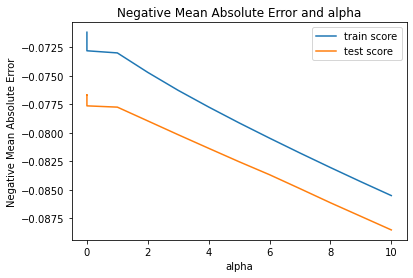

In [80]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [81]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.933277,0.933107,0.943027
1,R2 Score (Test),0.886067,0.885449,0.895717
2,RSS (Train),10.304200,10.330480,8.798476
3,RSS (Test),6.939180,6.976845,6.351458
4,MSE (Train),0.101713,0.101843,0.093988
5,MSE (Test),0.127330,0.127676,0.121819


In [93]:
# Put the Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values("Coefficient", axis = 0, ascending = False,
                 inplace = True, na_position ='first')
lasso_df.head(10)

,Features,Coefficient
208,GrLivArea,0.7470
199,OverallQual,0.4180
200,OverallCond,0.3557
205,TotalBsmtSF,0.2802
198,LotArea,0.1517
202,BsmtFinSF1,0.1433
46,Neighborhood_StoneBr,0.1330
30,Neighborhood_Crawfor,0.1054
196,SaleCondition_Partial,0.0999
75,Exterior1st_BrkFace,0.0987
